In [113]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default='plotly_white'

In [114]:
df=pd.read_csv('./data.csv',encoding='latin-1')

In [115]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [117]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [118]:
df.duplicated().sum()

0

## Intial Observations

* There are 9994 Rows and 21 Columns
* There is no null values nor duplicate values
* We onl need 'Order Date','Segment','Category','Sub-Category','Sales','Quantity','Profit' for this analysis other column can be dropped
* Order date is string it has to change to date type and Order Day, Month and Year needs to be in new column.
  

In [120]:
df.columns
df=df.loc[:,['Order Date','Segment','Category','Sub-Category','Sales','Quantity','Profit']]

In [121]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [122]:
df['Order Day']=df['Order Date'].dt.day
df['Order Month']=df['Order Date'].dt.month
df['Order Year']=df['Order Date'].dt.year
df.head()

,Order Date,Segment,Category,Sub-Category,Sales,Quantity,Profit,Order Day,Order Month,Order Year
0,2016-11-08,Consumer,Furniture,Bookcases,261.9600,2,41.9136,8,11,2016
1,2016-11-08,Consumer,Furniture,Chairs,731.9400,3,219.5820,8,11,2016
2,2016-06-12,Corporate,Office Supplies,Labels,14.6200,2,6.8714,12,6,2016
3,2015-10-11,Consumer,Furniture,Tables,957.5775,5,-383.0310,11,10,2015
4,2015-10-11,Consumer,Office Supplies,Storage,22.3680,2,2.5164,11,10,2015


In [123]:
df.isna().sum()

Order Date      0
Segment         0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Profit          0
Order Day       0
Order Month     0
Order Year      0
dtype: int64

In [124]:
sales_by_month= df.groupby('Order Month')['Sales'].sum().reset_index()
print(sales_by_month)

    Order Month        Sales
0             1   94924.8356
1             2   59751.2514
2             3  205005.4888
3             4  137762.1286
4             5  155028.8117
5             6  152718.6793
6             7  147238.0970
7             8  159044.0630
8             9  307649.9457
9            10  200322.9847
10           11  352461.0710
11           12  325293.5035


In [125]:
fig= px.line(sales_by_month,x='Order Month',y='Sales',title='Sales by Month')
fig.show()

In [126]:
sales_by_category=df.groupby('Category')['Sales'].sum().reset_index()
fig=px.bar(sales_by_category,x='Category',y='Sales',title='Category-wise Sales Bar Chart')
fig.show()

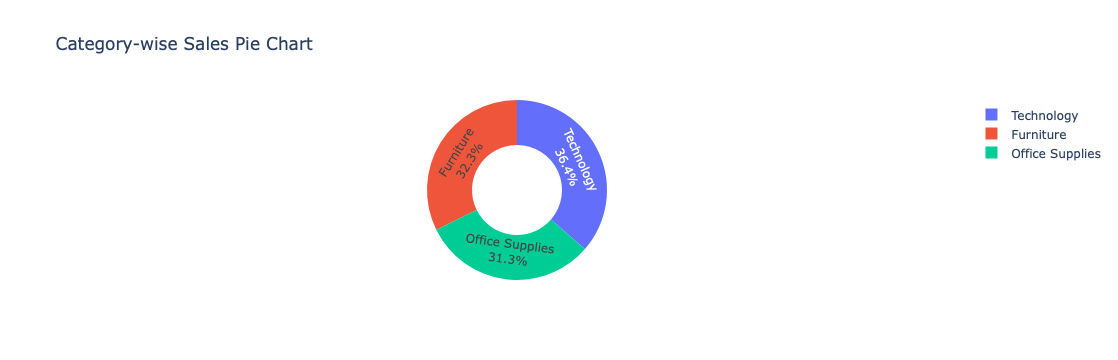

In [127]:
fig=px.pie(sales_by_category,names='Category',values='Sales',title='Category-wise Sales Pie Chart',hole=0.5)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

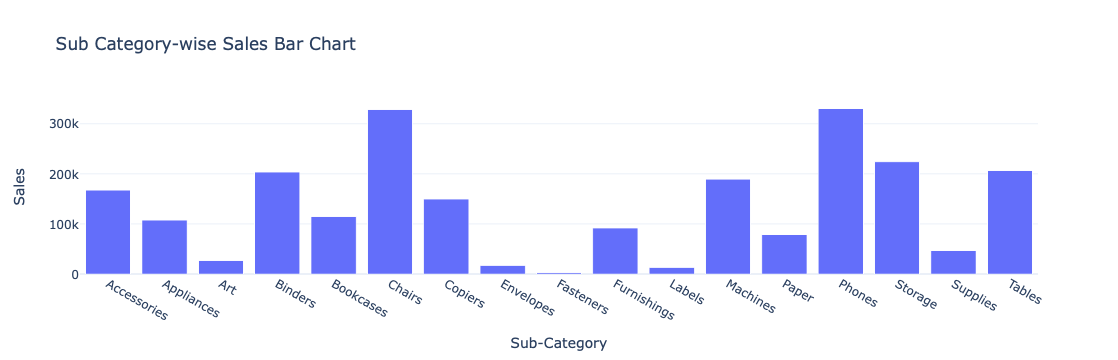

In [128]:
sales_by_subcategory=df.groupby('Sub-Category')['Sales'].sum().reset_index()
fig=px.bar(sales_by_subcategory,x='Sub-Category',y='Sales',title='Sub Category-wise Sales Bar Chart')
fig.show()

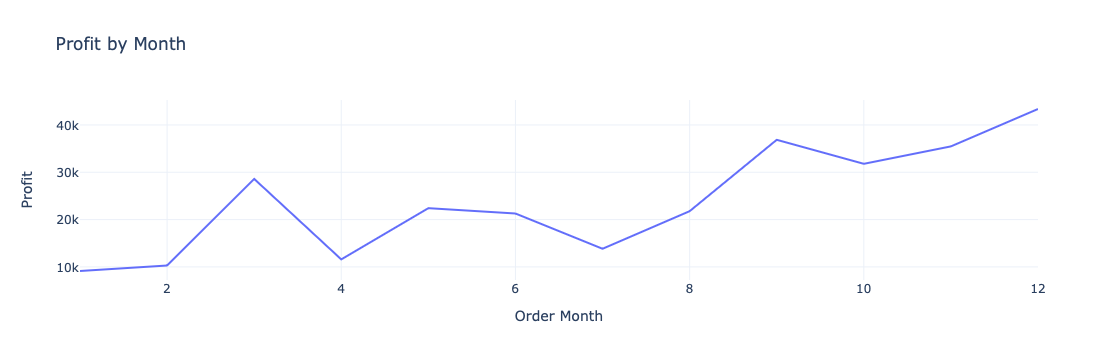

In [129]:
profit_by_month=df.groupby('Order Month')['Profit'].sum().reset_index()
fig=px.line(profit_by_month,x='Order Month',y='Profit',title='Profit by Month')
fig.show()

In [130]:
profit_by_category=df.groupby('Category')['Profit'].sum().reset_index()
fig=px.pie(profit_by_category,names='Category',values='Profit',title='Category-wise Profit Pie Chart')
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

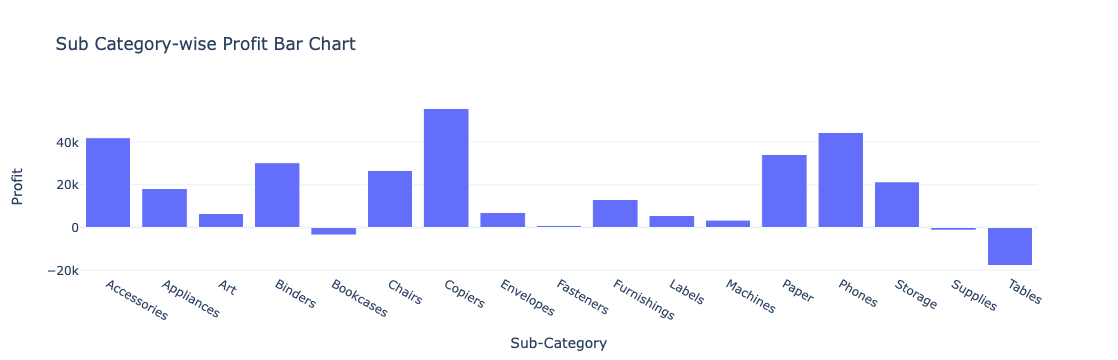

In [148]:
profit_by_subcategory=df.groupby('Sub-Category')['Profit'].sum().reset_index()
fig=px.bar(profit_by_subcategory,x='Sub-Category',y='Profit',title='Sub Category-wise Sales Bar Chart')
fig.show()

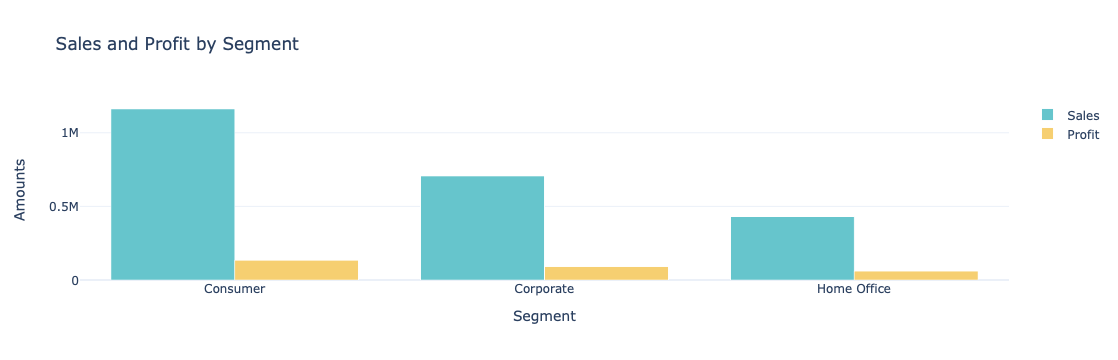

In [168]:
sales_profit_by_segment=df.groupby('Segment').agg({'Sales':np.sum,'Profit':np.sum}).reset_index()
color_palette=colors.qualitative.Pastel

fig=go.Figure()

fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'],y=sales_profit_by_segment['Sales'],name='Sales',marker_color=color_palette[0]))
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'],y=sales_profit_by_segment['Profit'],name='Profit',marker_color=color_palette[1]))
fig.update_layout(title='Sales and Profit by Segment',xaxis_title='Segment',yaxis_title='Amounts')
fig.show()